In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.tabular import *
from fastai.vision import *
import pandas as pd

In [0]:
path = Path("/content")

In [0]:
df = pd.read_csv(path/"ML_CSV_PRE.csv", sep=";", index_col=0)

In [0]:
df.drop('id', axis=1, inplace=True)

In [0]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,1,168,62.0,110,80.0,1,1,0,0,1,0
1,55.0,0,156,85.0,140,90.0,3,1,0,0,1,1
2,52.0,0,165,64.0,130,70.0,3,1,0,0,0,1
3,48.0,1,169,82.0,150,100.0,1,1,0,0,1,1
4,48.0,0,156,56.0,100,60.0,1,1,0,0,0,0


In [0]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69275.000000,69275.000000,69275.000000,69275.000000,69275.000000,69275.000000,69275.000000,69275.000000,69275.000000,69275.000000,69275.000000,69275.000000
mean,53.333612,0.348870,164.444331,74.133684,126.725558,81.383327,1.364966,1.225233,0.087939,0.053280,0.803796,0.497481
std,6.767572,0.476616,7.838418,14.268632,16.392862,9.327298,0.678888,0.571083,0.283209,0.224594,0.397127,0.499997
min,30.000000,0.000000,132.000000,32.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,1.000000,207.000000,180.000000,190.000000,110.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
dep_var = "cardio"
cat_names = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]
cont_names = ["height", "weight", "ap_hi", "ap_lo"]
procs = [FillMissing, Categorify, Normalize]

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
        .split_by_idx(valid_idx=range(6000,20000))
        .label_from_df(cols=dep_var)
        .databunch())

In [0]:
data.show_batch()

gender,cholesterol,gluc,smoke,alco,active,height,weight,ap_hi,ap_lo,target
0,3,3,0,0,1,0.5817,-0.4314,-0.4125,0.9206,1
1,1,1,0,0,1,1.6018,0.1272,-0.4125,-0.1509,0
0,1,1,0,0,1,-0.3108,0.8953,-1.0229,-1.2223,0
0,1,1,0,0,1,-1.8409,-1.3391,-1.0229,0.9206,0
0,1,1,0,0,0,-0.5658,0.2669,0.0757,0.1706,0


In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


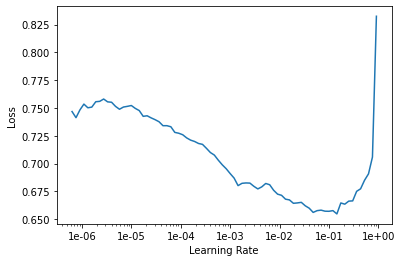

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-02
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.554810,0.561728,0.730143,00:08
1,0.568346,0.561646,0.728929,00:08
2,0.570560,0.560337,0.729357,00:08
3,0.568410,0.559951,0.729714,00:08
4,0.560244,0.558629,0.729929,00:08


In [0]:
learn.save("stage-1-200-100")

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


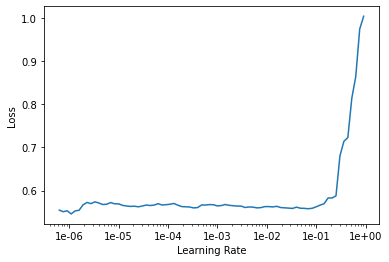

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=0.001
learn.fit_one_cycle(5, slice(0.001/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.554405,0.558951,0.729714,00:08
1,0.560847,0.558697,0.730071,00:08
2,0.546244,0.558670,0.729214,00:08
3,0.559337,0.558164,0.729143,00:08
4,0.553047,0.559050,0.729286,00:08


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


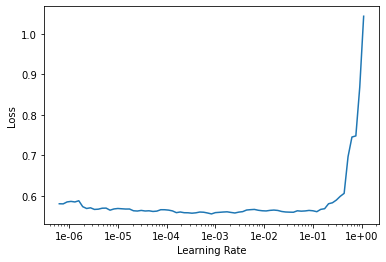

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(1e-10))

epoch,train_loss,valid_loss,accuracy,time
0,0.555583,0.558341,0.729643,00:08
1,0.563985,0.558332,0.729786,00:08
2,0.570257,0.558546,0.729929,00:08
3,0.552218,0.558297,0.729214,00:08
4,0.558827,0.558968,0.728143,00:08


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


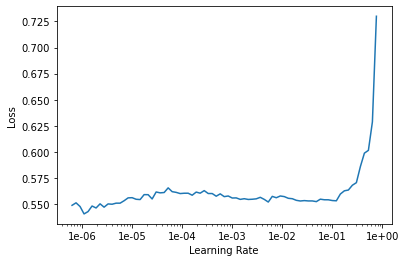

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(1e-30))

epoch,train_loss,valid_loss,accuracy,time
0,0.557697,0.559004,0.729357,00:08
1,0.551839,0.558604,0.729857,00:08
2,0.554116,0.558449,0.729000,00:08
3,0.550182,0.558632,0.729643,00:08
4,0.556763,0.558375,0.729071,00:08


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


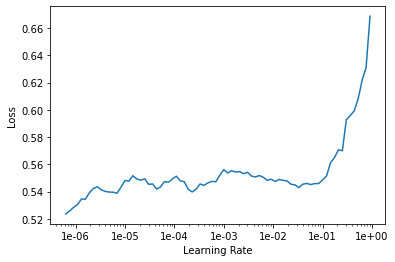

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(1e-100))

epoch,train_loss,valid_loss,accuracy,time
0,0.552549,0.558479,0.728643,00:08
1,0.544418,0.558227,0.728929,00:08
2,0.550997,0.558538,0.729500,00:08
3,0.550197,0.558883,0.729786,00:08
4,0.560564,0.558498,0.729000,00:08


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


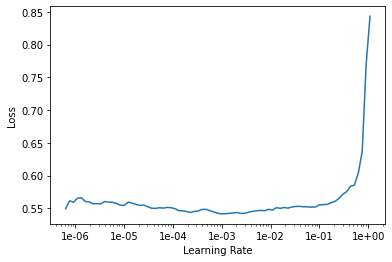

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(1e-10000))

epoch,train_loss,valid_loss,accuracy,time
0,0.562967,0.558870,0.728214,00:08
1,0.563821,0.558558,0.728929,00:08
2,0.544830,0.558381,0.730643,00:08
3,0.553209,0.558369,0.729071,00:08
4,0.562855,0.558751,0.730071,00:08


In [0]:
learn.fit_one_cycle(5, max_lr=1e-1000000)

epoch,train_loss,valid_loss,accuracy,time
0,0.559312,0.558171,0.729429,00:08
1,0.550930,0.558186,0.729214,00:08
2,0.538659,0.558201,0.729643,00:08
3,0.552237,0.558557,0.729214,00:08
4,0.563875,0.558102,0.729500,00:08
